In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
#import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('df_ufc_masters.csv')
df

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch,Winner_Blue,Winner_Red,better_rank_Blue,better_rank_Red,better_rank_neither
0,Thiago Santos,Johnny Walker,0.600000,0.434783,66.666667,130.000000,02-10-2021,"Las Vegas, Nevada, USA",USA,Red,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,Alex Oliveira,Niko Price,0.370370,0.666667,170.000000,50.000000,02-10-2021,"Las Vegas, Nevada, USA",USA,Blue,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,Misha Cirkunov,Krzysztof Jotko,0.476190,0.565217,110.000000,76.923077,02-10-2021,"Las Vegas, Nevada, USA",USA,Blue,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,Alexander Hernandez,Mike Breeden,0.870968,0.173913,14.814815,475.000000,02-10-2021,"Las Vegas, Nevada, USA",USA,Red,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,Joe Solecki,Jared Gordon,0.574468,0.465116,74.074074,115.000000,02-10-2021,"Las Vegas, Nevada, USA",USA,Blue,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4889,Duane Ludwig,Darren Elkins,0.607843,0.425532,64.516129,135.000000,21-03-2010,"Broomfield, Colorado, USA",USA,Blue,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4890,John Howard,Daniel Roberts,0.677419,0.363636,47.619048,175.000000,21-03-2010,"Broomfield, Colorado, USA",USA,Red,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4891,Brendan Schaub,Chase Gormley,0.722222,0.312500,38.461538,220.000000,21-03-2010,"Broomfield, Colorado, USA",USA,Red,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4892,Mike Pierce,Julio Paulino,0.807692,0.229885,23.809524,335.000000,21-03-2010,"Broomfield, Colorado, USA",USA,Red,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


array([[<Axes: title={'center': 'R_Height_cms'}>,
        <Axes: title={'center': 'R_Reach_cms'}>],
       [<Axes: title={'center': 'R_age'}>, <Axes: >]], dtype=object)

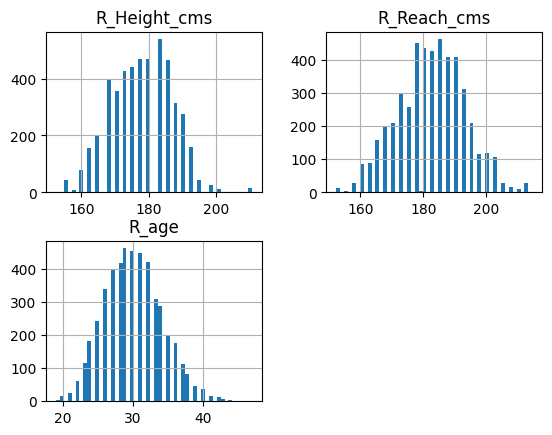

In [3]:
columns = ['R_Height_cms', 'R_Reach_cms', 'R_age']
df[columns].hist(bins=50)

In [4]:
features_min_max_sc = ['R_Height_cms', 'R_Reach_cms', 'R_age']

minmax_sc = MinMaxScaler()
minmax_sc.fit(df[features_min_max_sc])
df[['R_Height_mm', 'R_Reach_mm', 'R_age_mm']] = minmax_sc.transform(df[features_min_max_sc])

array([[<Axes: title={'center': 'R_Height_mm'}>,
        <Axes: title={'center': 'R_Reach_mm'}>],
       [<Axes: title={'center': 'R_age_mm'}>, <Axes: >]], dtype=object)

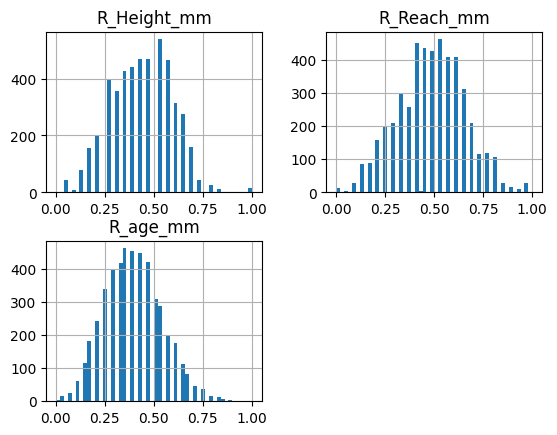

In [5]:
columns = ['R_Height_mm', 'R_Reach_mm', 'R_age_mm']
df[columns].hist(bins=50)

In [6]:
features_names = ['R_Height_mm', 'R_Reach_mm', 'R_age_mm']

X = np.c_[df[features_names]]
y = np.c_[df['Winner_Red']]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
model_lin = LogisticRegression()
model_lin.fit(X_train, y_train.reshape(-1))

LogisticRegression()

In [9]:
y_pred_train = model_lin.predict(X_train)
y_pred_test = model_lin.predict(X_test)

Train accuracy: 0.59029374201788
Train precsision: 0.5925619834710744
Train recall: 0.945079086115993


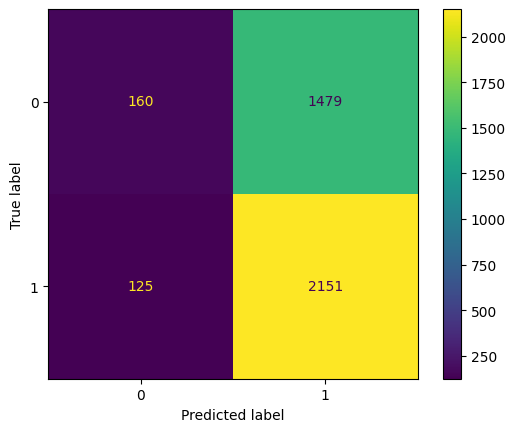

In [10]:
acc_train = accuracy_score(y_train, y_pred_train)
cm_train = confusion_matrix(y_train, y_pred_train)
ConfusionMatrixDisplay(cm_train).plot()
tn = cm_train[0,0]
fp = cm_train[0,1]
fn = cm_train[1,0]
tp = cm_train[1,1]
precision = tp/(fp+tp)
recall = tp/(tp+fn)

print(f'Train accuracy: {acc_train}')
print(f'Train precsision: {precision}')
print(f'Train recall: {recall}')

Test accuracy: 0.5965270684371808
Test precsision: 0.6024229074889867
Test recall: 0.9414802065404475


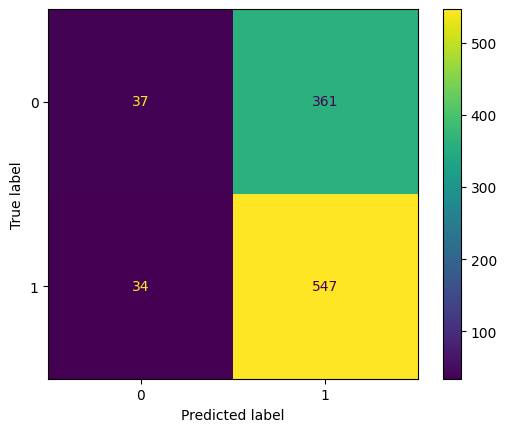

In [11]:
acc_test = accuracy_score(y_test, y_pred_test)
cm_test = confusion_matrix(y_test, y_pred_test)
ConfusionMatrixDisplay(cm_test).plot()
tn = cm_test[0,0]
fp = cm_test[0,1]
fn = cm_test[1,0]
tp = cm_test[1,1]
precision_test = tp/(fp+tp)
recall_test = tp/(tp+fn)

print(f'Test accuracy: {acc_test}')
print(f'Test precsision: {precision_test}')
print(f'Test recall: {recall_test}')